In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Define a function to calculate the index
def index(i):
    """
    Calculate the step-value of the i-th Haar wavelet
    """
    j = int(np.ceil(np.log2(i))) - 1
    k = int(i - 2 ** j) - 1
    return j, k

In [9]:
# Define the Haar wavelet function
def haar(x, i):
    """
    x: the input value
    i: the index of the wavelet function
    
    return: the value of the wavelet function
    """
    if i == 1:
        if 0 <= x and x < 1:
            return 1
        else:
            return 0
    if i >= 2:
        j, k = index(i) # j is the scale, k is the translation
        m = 2 ** j
        alpha = k / m
        beta = (k + 0.5) / m
        gamma = (k + 1) / m
        if alpha <= x and x < beta:
            return 1
        elif beta <= x and x < gamma:
            return -1
        else:
            return 0

In [10]:
# define the Haar wavelet function for input is a vector
def haar_vec(x, i):
    """
    x: input vector
    i: the index of the Haar wavelet function

    return: the Haar wavelet function
    """
    if i == 1:
        return np.ones(len(x))
    if i >= 2:
        j, k = index(i) # j is the scale, k is the translation
        m = 2 ** j
        alpha = k / m
        beta = (k + 0.5) / m
        gamma = (k + 1) / m
        a = (x>=alpha) & (x<beta) 
        b = (x>=beta) & (x<=gamma)
        b = b.astype(int)
        a = a.astype(int)
        c = a - b
        return c

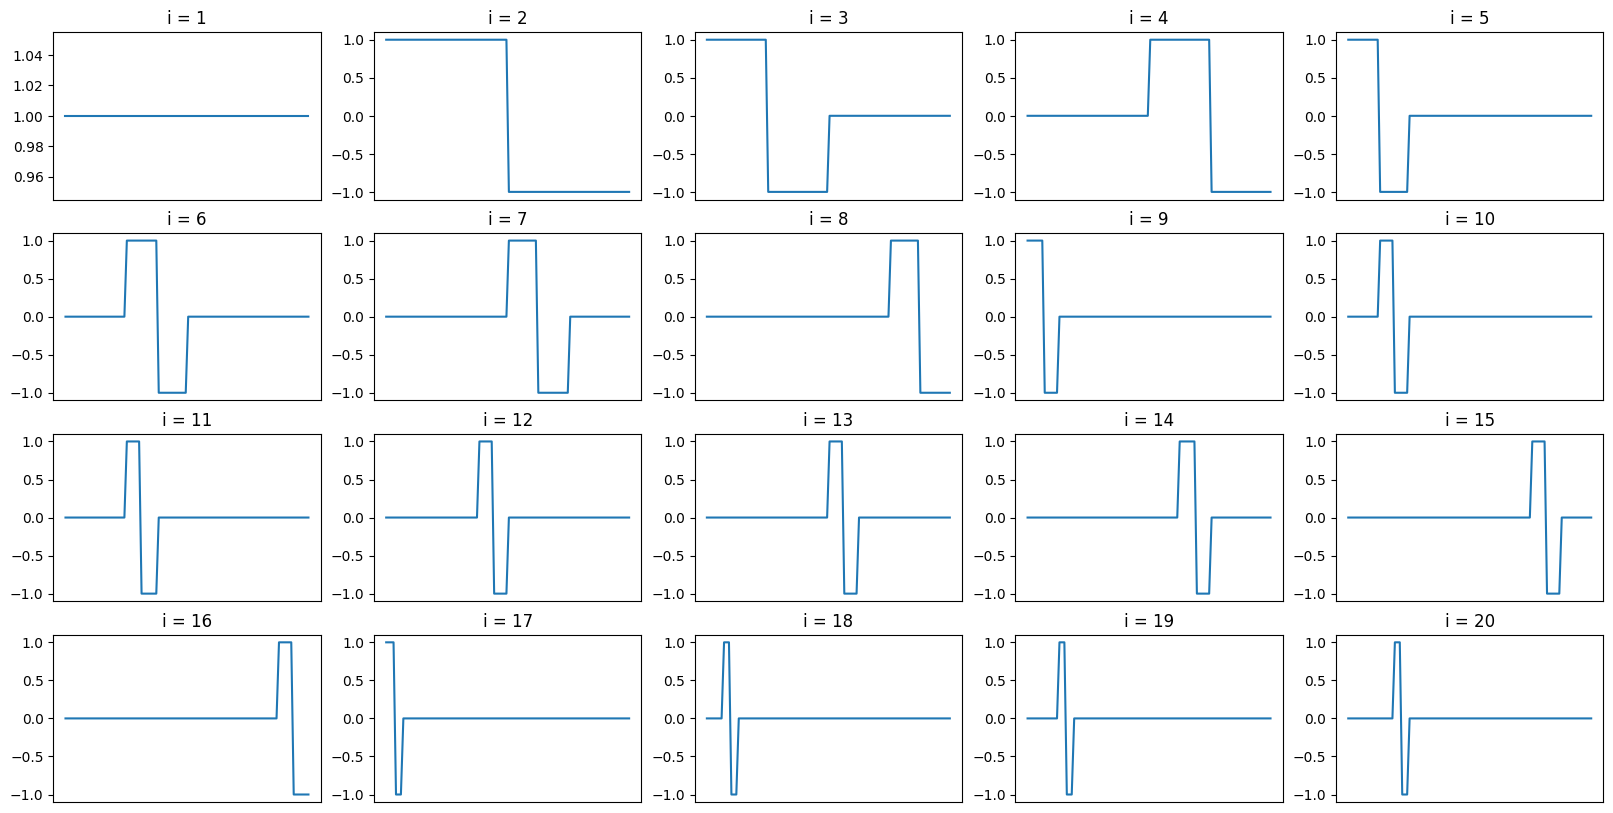

In [17]:
# plot the Haar wavelet function
fig, ax = plt.subplots(4, 5, figsize=(20, 10))
x = np.linspace(0, 1, 100)
for i in range(1, 21):
    ax[int((i - 1) / 5), (i - 1) % 5].plot(x, haar_vec(x, i))
    ax[int((i - 1) / 5), (i - 1) % 5].get_xaxis().set_visible(False) # make x-axis do not show
    ax[int((i - 1) / 5), (i - 1) % 5].set_title('i = ' + str(i))
plt.show()

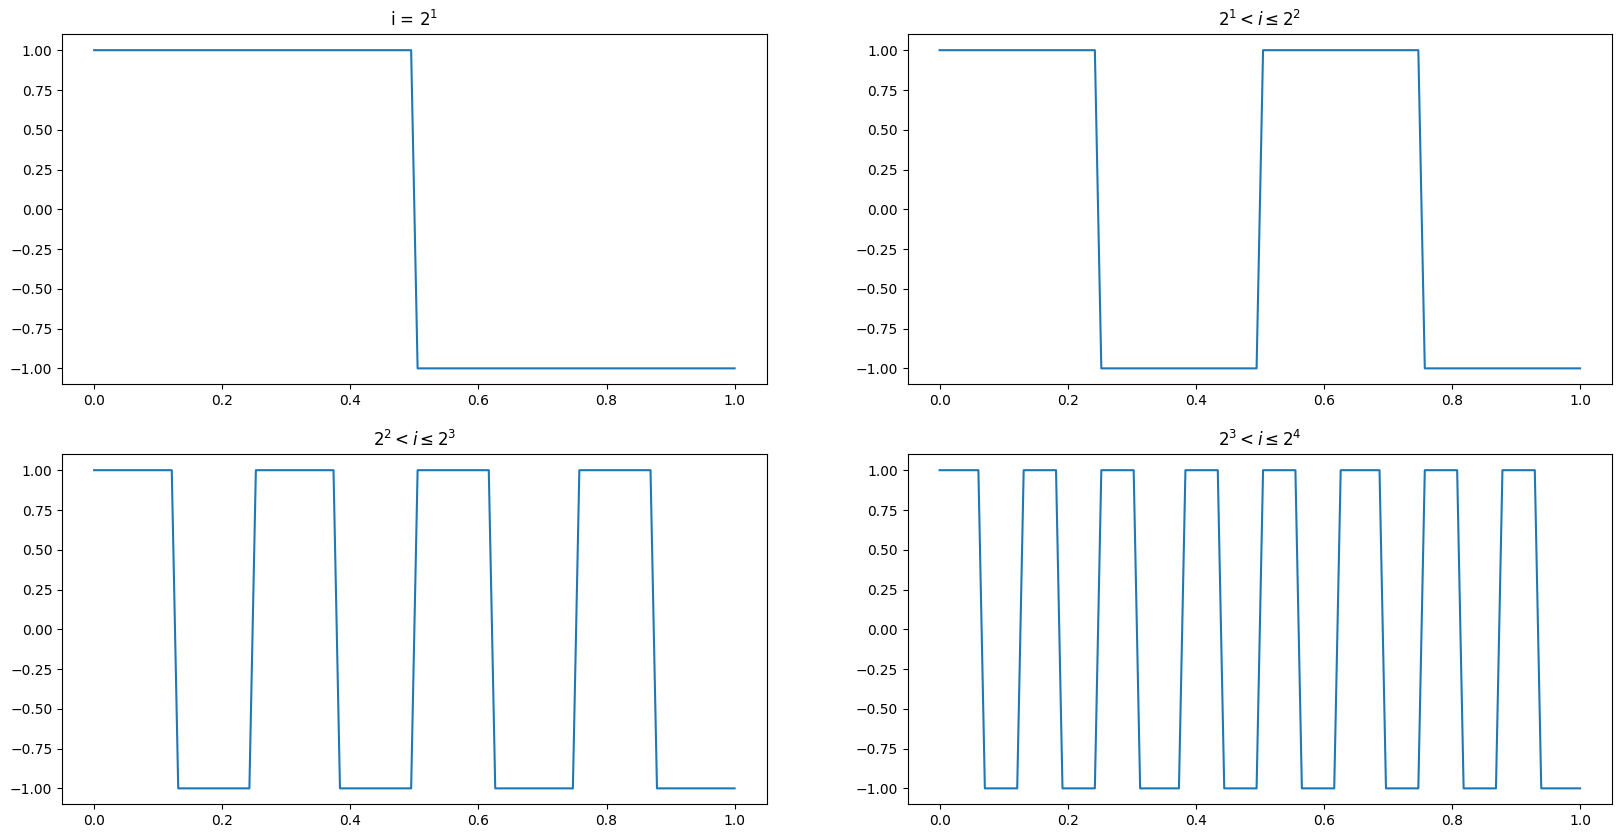

In [36]:
# plot the overlap of the Haar wavelet function
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
x = np.linspace(0, 1, 100)
ax[0, 0].plot(x, haar_vec(x, 2))
ax[0, 0].title.set_text('i = $2^{1}$')

y = np.zeros(len(x))
for i in range(3, 5):
    y += haar_vec(x, i)
ax[0, 1].plot(x, y)
ax[0, 1].title.set_text('$2^{1} < i \leq 2^{2}$')

y = np.zeros(len(x))
for i in range(5, 9):
    y += haar_vec(x, i)
ax[1, 0].plot(x, y)
ax[1, 0].title.set_text('$2^{2} < i \leq 2^{3}$')

y = np.zeros(len(x))
for i in range(9, 17):
    y += haar_vec(x, i)
ax[1, 1].plot(x, y)
ax[1, 1].title.set_text('$2^{3} < i \leq 2^{4}$')

plt.show()